# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Tasks Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

#### **1.1.1**
Load the dataset

In [3]:
# Load the data

df = pd.read_csv("Car_Price_data.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

## **2 Analysis and Feature Engineering** <font color =red> [35 marks] </font>



### **2.1 Preliminary Analysis and Frequency Distributions** <font color = red> [13 marks] </font>

#### **2.1.1** <font color =red> [1 marks] </font>
Check and fix missing values.

In [4]:
# Find the proportion of missing values in each column and handle if found
null_ratio = df.isnull().mean() * 100
null_ratio

make_model             0.0
body_type              0.0
price                  0.0
vat                    0.0
km                     0.0
Type                   0.0
Fuel                   0.0
Gears                  0.0
Comfort_Convenience    0.0
Entertainment_Media    0.0
Extras                 0.0
Safety_Security        0.0
age                    0.0
Previous_Owners        0.0
hp_kW                  0.0
Inspection_new         0.0
Paint_Type             0.0
Upholstery_type        0.0
Gearing_Type           0.0
Displacement_cc        0.0
Weight_kg              0.0
Drive_chain            0.0
cons_comb              0.0
dtype: float64

**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

#### **2.1.2** <font color =red> [3 marks] </font>
Identify numerical predictors and plot their frequency distributions.

In [5]:
# Identify numerical features and plot histograms

numerical_predictors = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_predictors

['price',
 'km',
 'Gears',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'Weight_kg',
 'cons_comb']

In [6]:
num_summary = df[numerical_predictors].describe().T
num_summary

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


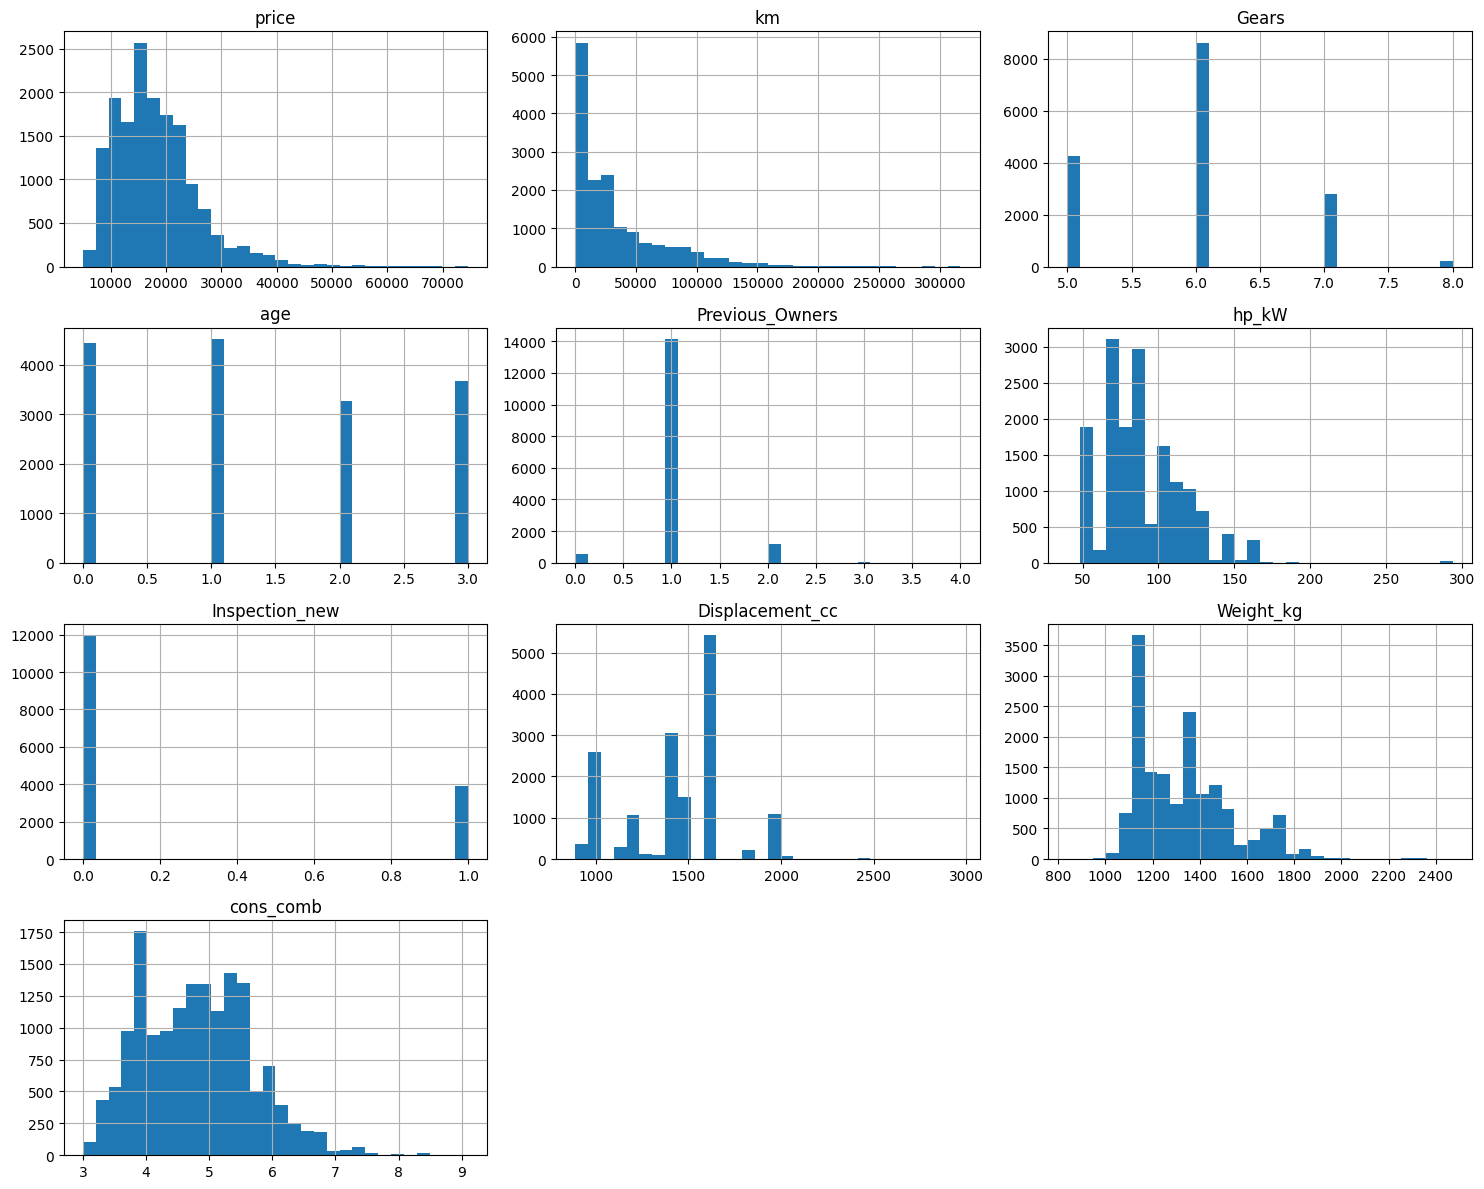

In [7]:
df[numerical_predictors].hist(
    bins=30,
    figsize=(15, 12)
)

plt.tight_layout()
plt.show()

\#### **2.1.3** <font color =red> [3 marks] </font>
Identify categorical predictors and plot their frequency distributions.

In [8]:
# Identify categorical columns and check their frequency distributions
categorical_predictors = df.select_dtypes(include=['object']).columns.tolist()
categorical_predictors

['make_model',
 'body_type',
 'vat',
 'Type',
 'Fuel',
 'Comfort_Convenience',
 'Entertainment_Media',
 'Extras',
 'Safety_Security',
 'Paint_Type',
 'Upholstery_type',
 'Gearing_Type',
 'Drive_chain']

**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

In [9]:
df[categorical_predictors].nunique().sort_values(ascending=False)

Comfort_Convenience    6196
Safety_Security        4442
Extras                  659
Entertainment_Media     346
make_model                9
body_type                 8
Type                      5
Fuel                      4
Paint_Type                3
Gearing_Type              3
Drive_chain               3
vat                       2
Upholstery_type           2
dtype: int64

Based on the number of unique values, the columns `Comfort_Convenience`, `Safety_Security`, `Extras`, and `Entertainment_Media` are not treated as standard categorical variables. These columns have a very high number of unique values relative to the dataset size, indicating that they represent combinations of multiple features rather than a single categorical value per observation. Therefore, they are handled separately during feature engineering.


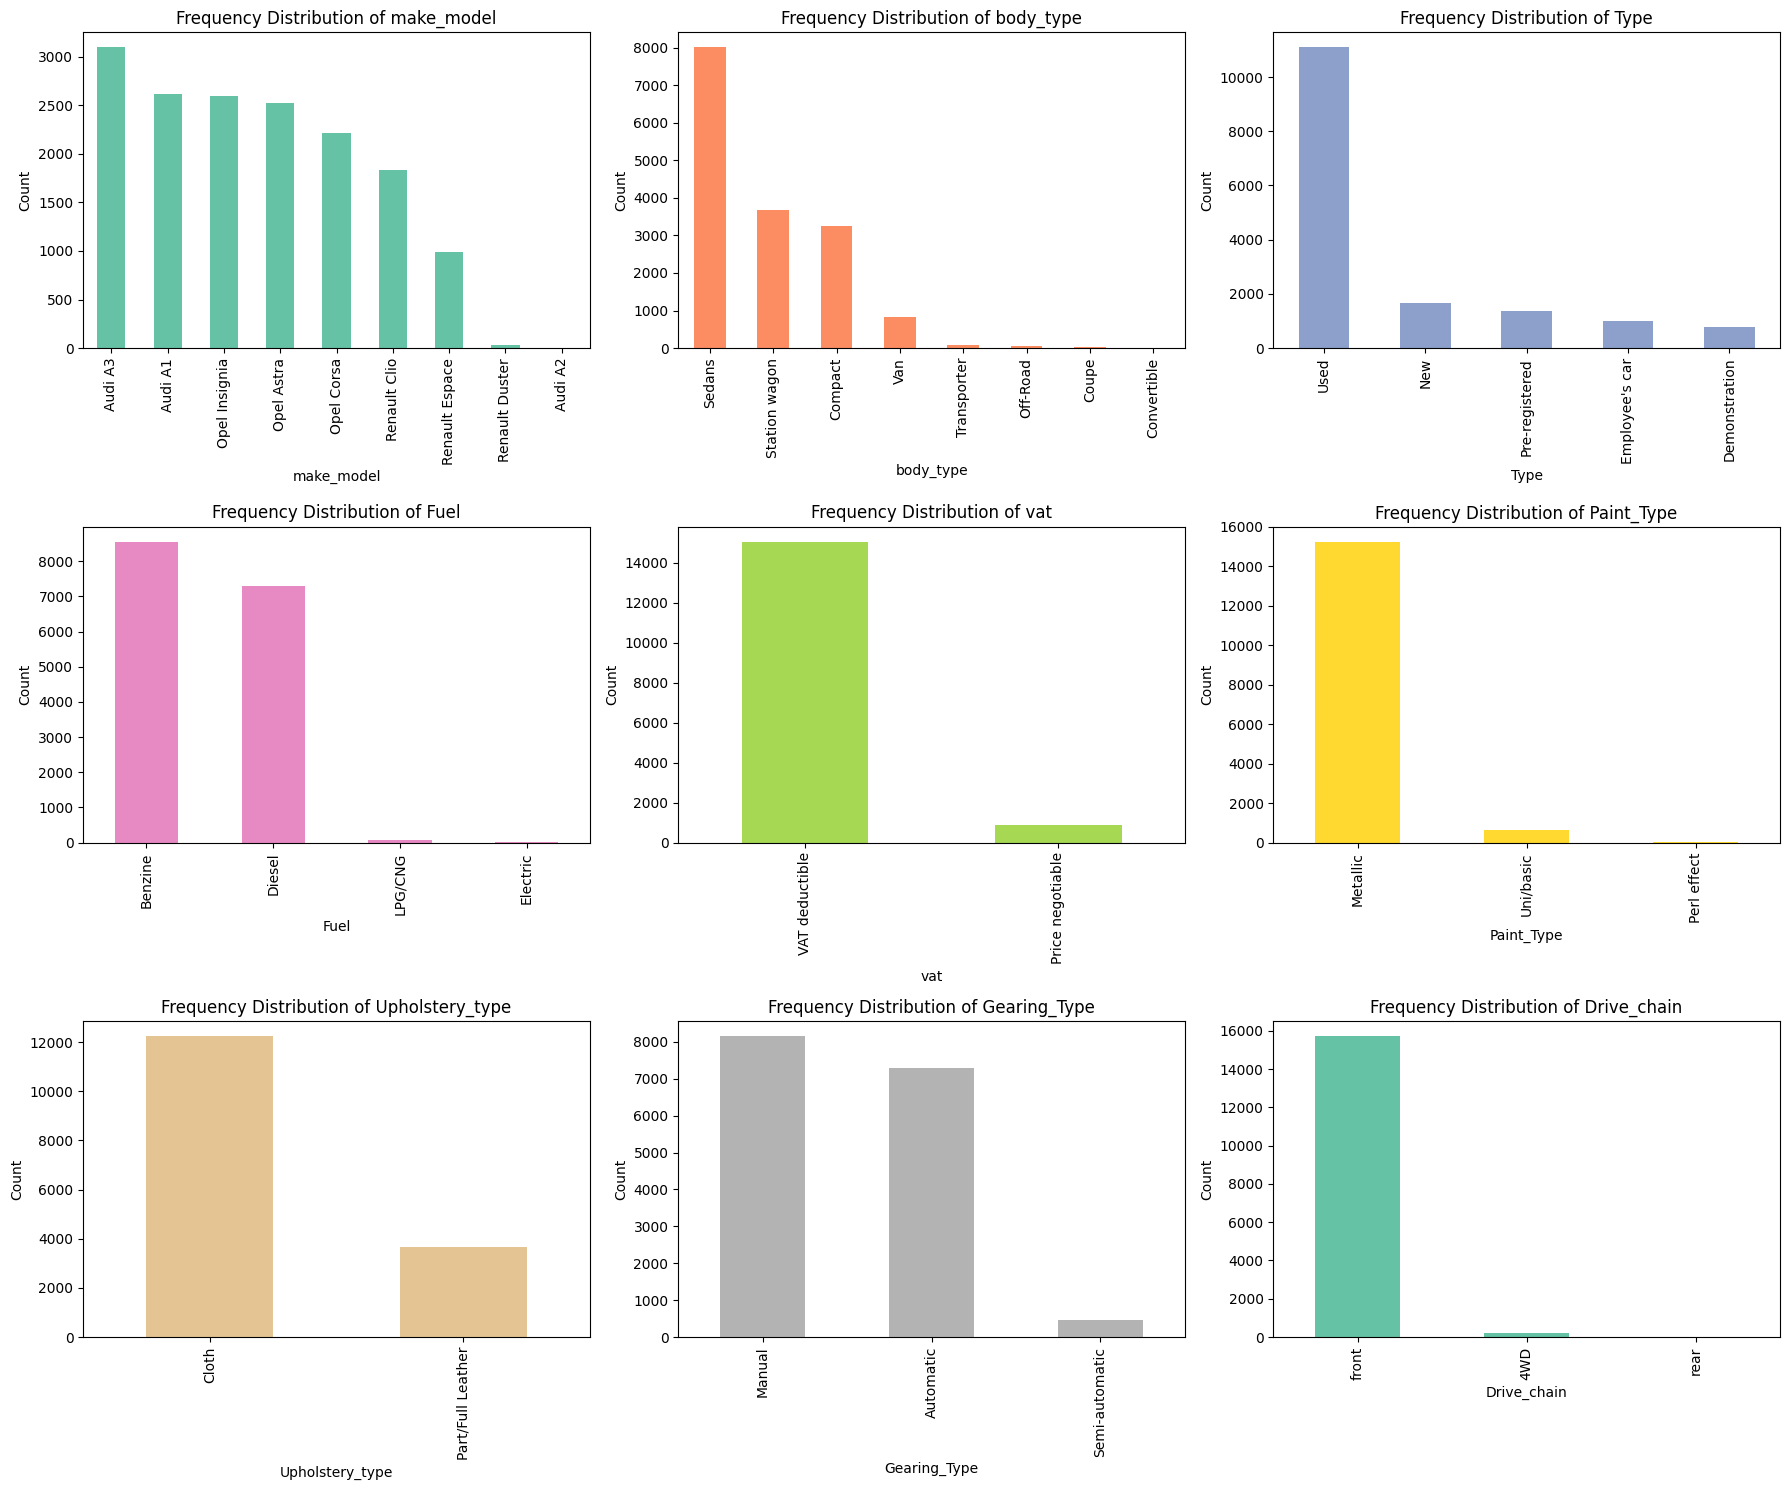

In [10]:
categorical_to_plot = [
    'make_model',
    'body_type',
    'Type',
    'Fuel',
    'vat',
    'Paint_Type',
    'Upholstery_type',
    'Gearing_Type',
    'Drive_chain'
]

colors = sns.color_palette("Set2", n_colors=len(categorical_to_plot))

rows = int(np.ceil(len(categorical_to_plot) / 3))
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(categorical_to_plot):
    df[col].value_counts().plot(
        kind='bar',
        ax=axes[idx],
        color=colors[idx]
    )
    axes[idx].set_title(f'Frequency Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

for i in range(len(categorical_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [11]:
# Summary tables for categorical predictors used in plots

categorical_info = {}

for col in categorical_to_plot:
    freq_table = df[col].value_counts()
    percentage_table = df[col].value_counts(normalize=True) * 100
    
    summary_df = pd.DataFrame({
        'Count': freq_table,
        'Percentage (%)': percentage_table.round(2)
    })
    
    categorical_info[col] = summary_df
    
    print(f"\nFrequency distribution for {col}:")
    display(summary_df)



Frequency distribution for make_model:


,Count,Percentage (%)
make_model,,
Audi A3,3097,19.46
Audi A1,2614,16.42
Opel Insignia,2598,16.32
Opel Astra,2525,15.87
Opel Corsa,2216,13.92
Renault Clio,1839,11.56
Renault Espace,991,6.23
Renault Duster,34,0.21
Audi A2,1,0.01



Frequency distribution for body_type:


,Count,Percentage (%)
body_type,,
Sedans,8004,50.29
Station wagon,3677,23.10
Compact,3240,20.36
Van,817,5.13
Transporter,88,0.55
Off-Road,56,0.35
Coupe,25,0.16
Convertible,8,0.05



Frequency distribution for Type:


,Count,Percentage (%)
Type,,
Used,11095,69.71
New,1649,10.36
Pre-registered,1364,8.57
Employee's car,1011,6.35
Demonstration,796,5.00



Frequency distribution for Fuel:


,Count,Percentage (%)
Fuel,,
Benzine,8548,53.71
Diesel,7298,45.86
LPG/CNG,64,0.40
Electric,5,0.03



Frequency distribution for vat:


,Count,Percentage (%)
vat,,
VAT deductible,15044,94.53
Price negotiable,871,5.47



Frequency distribution for Paint_Type:


,Count,Percentage (%)
Paint_Type,,
Metallic,15246,95.8
Uni/basic,637,4.0
Perl effect,32,0.2



Frequency distribution for Upholstery_type:


,Count,Percentage (%)
Upholstery_type,,
Cloth,12234,76.87
Part/Full Leather,3681,23.13



Frequency distribution for Gearing_Type:


,Count,Percentage (%)
Gearing_Type,,
Manual,8149,51.20
Automatic,7297,45.85
Semi-automatic,469,2.95



Frequency distribution for Drive_chain:


,Count,Percentage (%)
Drive_chain,,
front,15707,98.69
4WD,204,1.28
rear,4,0.03


#### **2.1.4** <font color =red> [3 marks] </font>
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [12]:
# Fix columns as needed

df['Type'] = df['Type'].replace({
    'New': 'Nearly New',
    'Pre-registered': 'Nearly New',
    "Employee's car": 'Nearly New',
    'Demonstration': 'Nearly New'
})

def consolidate_rare_categories(data, column, min_percentage=1.0):
    freq_percent = data[column].value_counts(normalize=True) * 100
    rare_classes = freq_percent[freq_percent < min_percentage].index
    data[column] = data[column].replace(rare_classes, 'Other')

consolidate_rare_categories(df, 'make_model', 1.0)
consolidate_rare_categories(df, 'body_type', 1.0)
consolidate_rare_categories(df, 'Fuel', 1.0)
consolidate_rare_categories(df, 'Paint_Type', 1.0)
consolidate_rare_categories(df, 'Gearing_Type', 1.0)
consolidate_rare_categories(df, 'Drive_chain', 1.0)

for col in ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type', 'Gearing_Type', 'Drive_chain']:
    display(df[col].value_counts())


make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Other               35
Name: count, dtype: int64

body_type
Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Other             177
Name: count, dtype: int64

Type
Used          11095
Nearly New     4820
Name: count, dtype: int64

Fuel
Benzine    8548
Diesel     7298
Other        69
Name: count, dtype: int64

Paint_Type
Metallic     15246
Uni/basic      637
Other           32
Name: count, dtype: int64

Gearing_Type
Manual            8149
Automatic         7297
Semi-automatic     469
Name: count, dtype: int64

Drive_chain
front    15707
4WD        204
Other        4
Name: count, dtype: int64

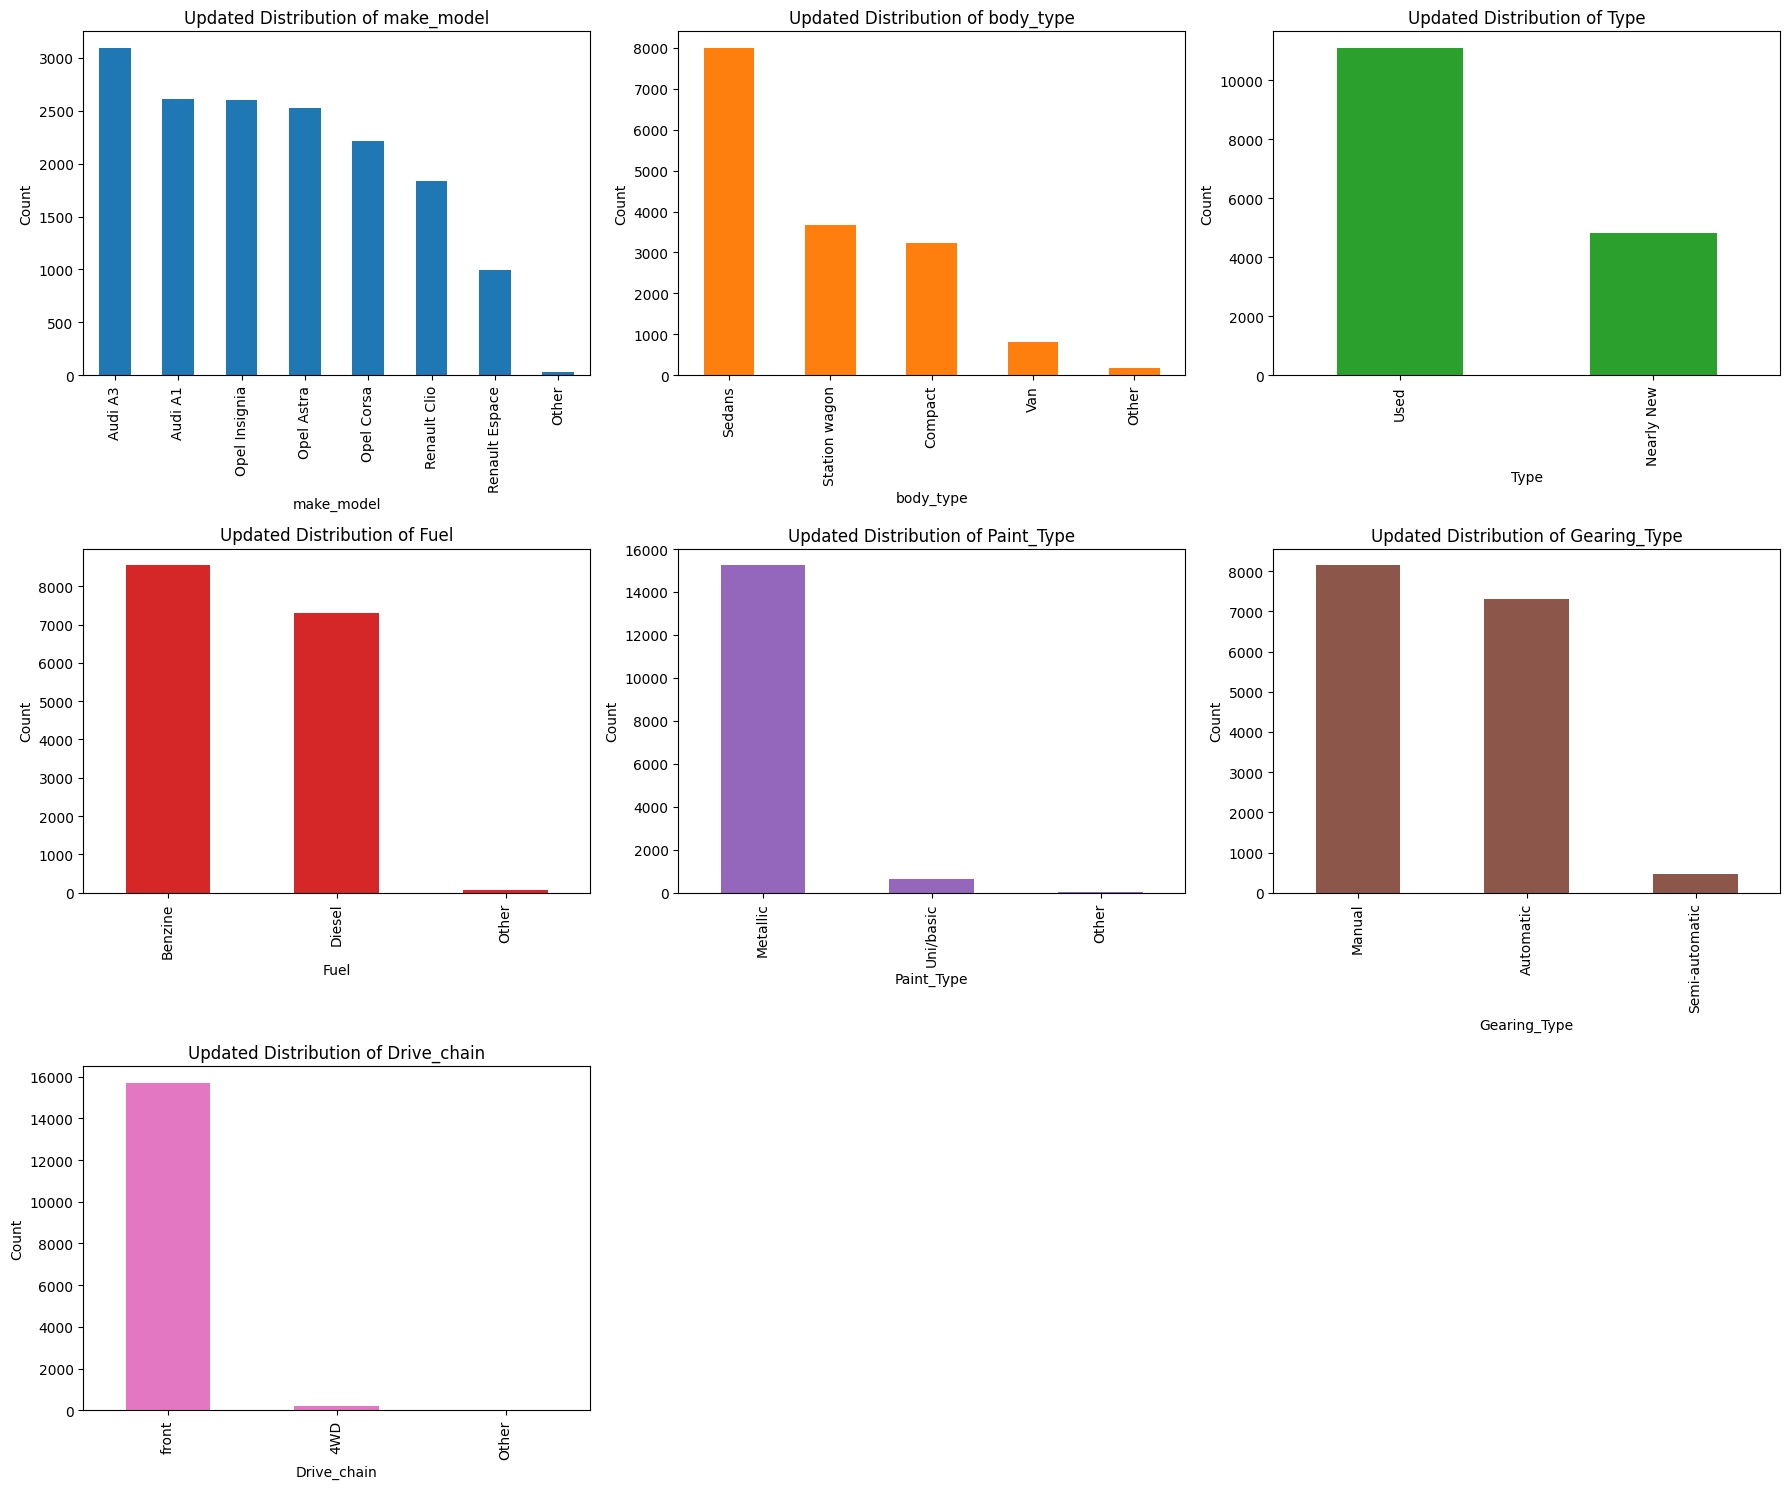

In [13]:
categorical_after_fix = [
    'make_model',
    'body_type',
    'Type',
    'Fuel',
    'Paint_Type',
    'Gearing_Type',
    'Drive_chain'
]

rows = int(np.ceil(len(categorical_after_fix) / 3))
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_after_fix):
    df[col].value_counts().plot(
        kind='bar',
        ax=axes[i],
        color=plt.cm.tab10.colors[i % 10]
    )
    axes[i].set_title(f'Updated Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(len(categorical_after_fix), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **2.1.5** <font color =red> [3 marks] </font>
Identify target variable and plot the frequency distributions. Apply necessary transformations.

In [14]:
target_feature = 'price'
target_feature

'price'

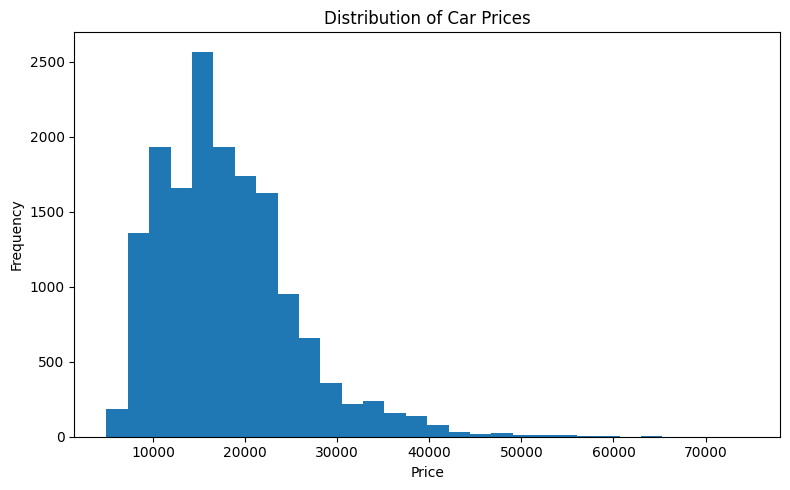

In [15]:
# Plot histograms for target feature

plt.figure(figsize=(8, 5))
plt.hist(df[target_feature], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.tight_layout()
plt.show()

In [16]:
target_stats = df[target_feature].describe()
target_skewness = df[target_feature].skew()

df['log_price'] = np.log(df[target_feature])

log_target_stats = df['log_price'].describe()
log_target_skewness = df['log_price'].skew()

target_stats, target_skewness, log_target_stats, log_target_skewness

(count    15915.000000
 mean     18024.380584
 std       7381.679318
 min       4950.000000
 25%      12850.000000
 50%      16900.000000
 75%      21900.000000
 max      74600.000000
 Name: price, dtype: float64,
 1.2361694128996692,
 count    15915.000000
 mean         9.720699
 std          0.398248
 min          8.507143
 25%          9.461099
 50%          9.735069
 75%          9.994242
 max         11.219896
 Name: log_price, dtype: float64,
 -0.03153776984995532)

**The target variable seems to be skewed. Perform suitable transformation on the target.**

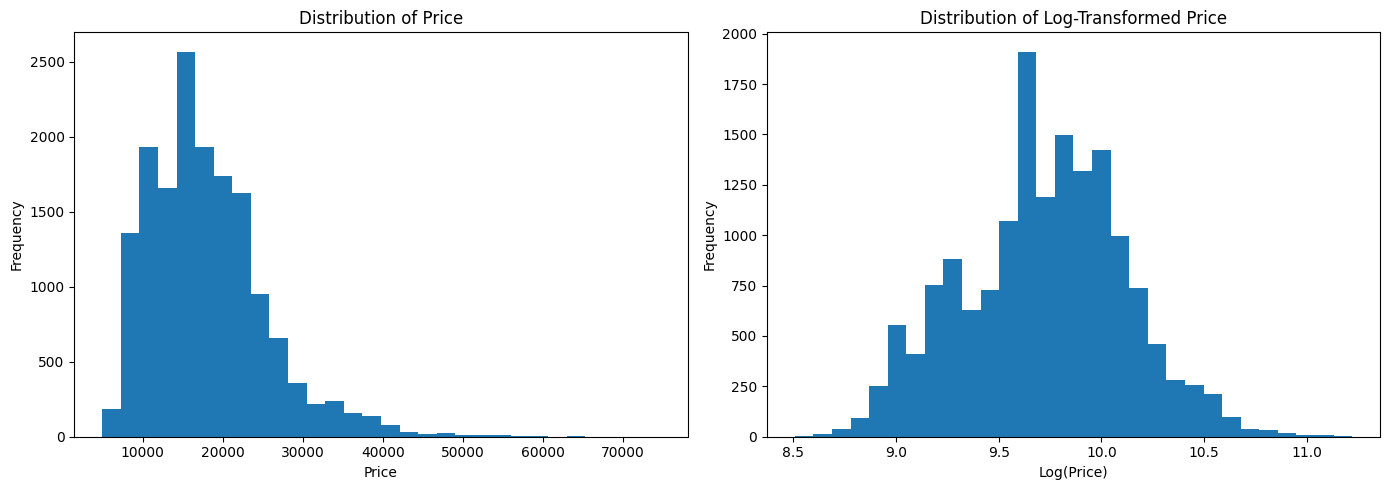

In [17]:
# Transform the target feature
df['log_price'] = np.log(df['price'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['price'], bins=30)
axes[0].set_title('Distribution of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['log_price'], bins=30)
axes[1].set_title('Distribution of Log-Transformed Price')
axes[1].set_xlabel('Log(Price)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
df['price'].skew(), df['log_price'].skew()

(1.2361694128996692, -0.03153776984995532)

### **2.2 Correlation analysis** <font color = red> [6 marks] </font>

#### **2.2.1** <font color =red> [3 marks] </font>
Plot the correlation map between features and target variable.

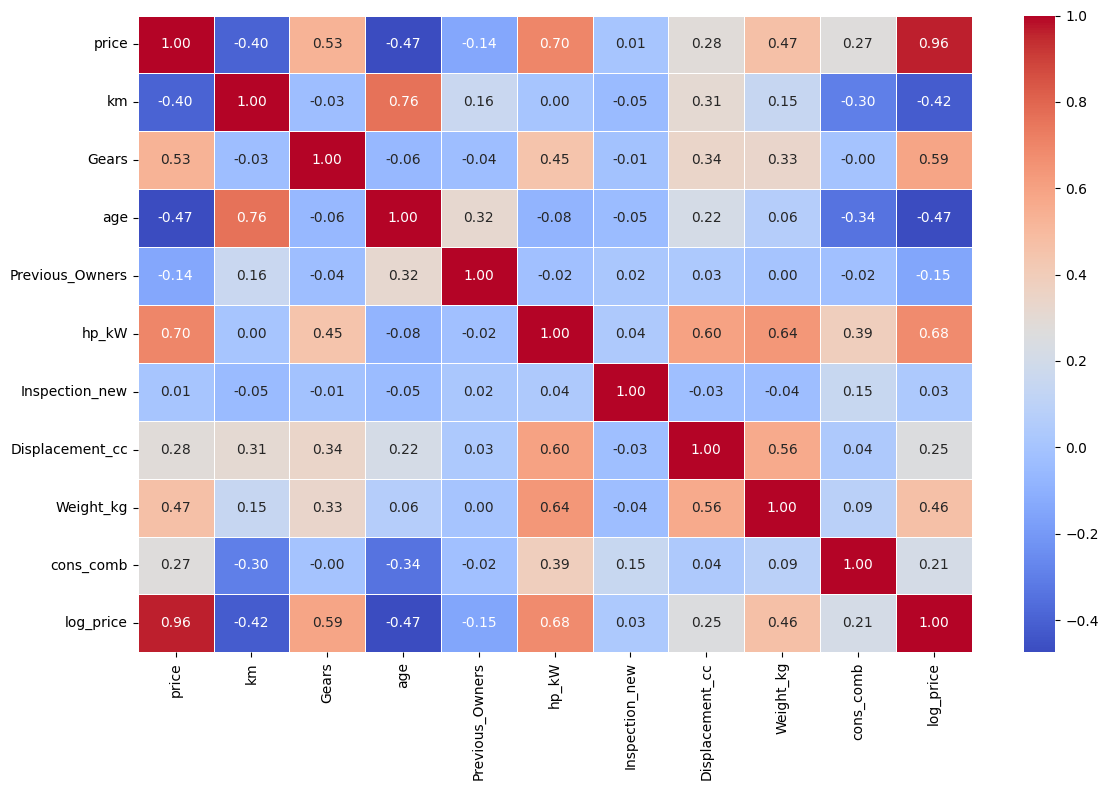

In [19]:
# Visualise correlation
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.tight_layout()
plt.show()

#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.

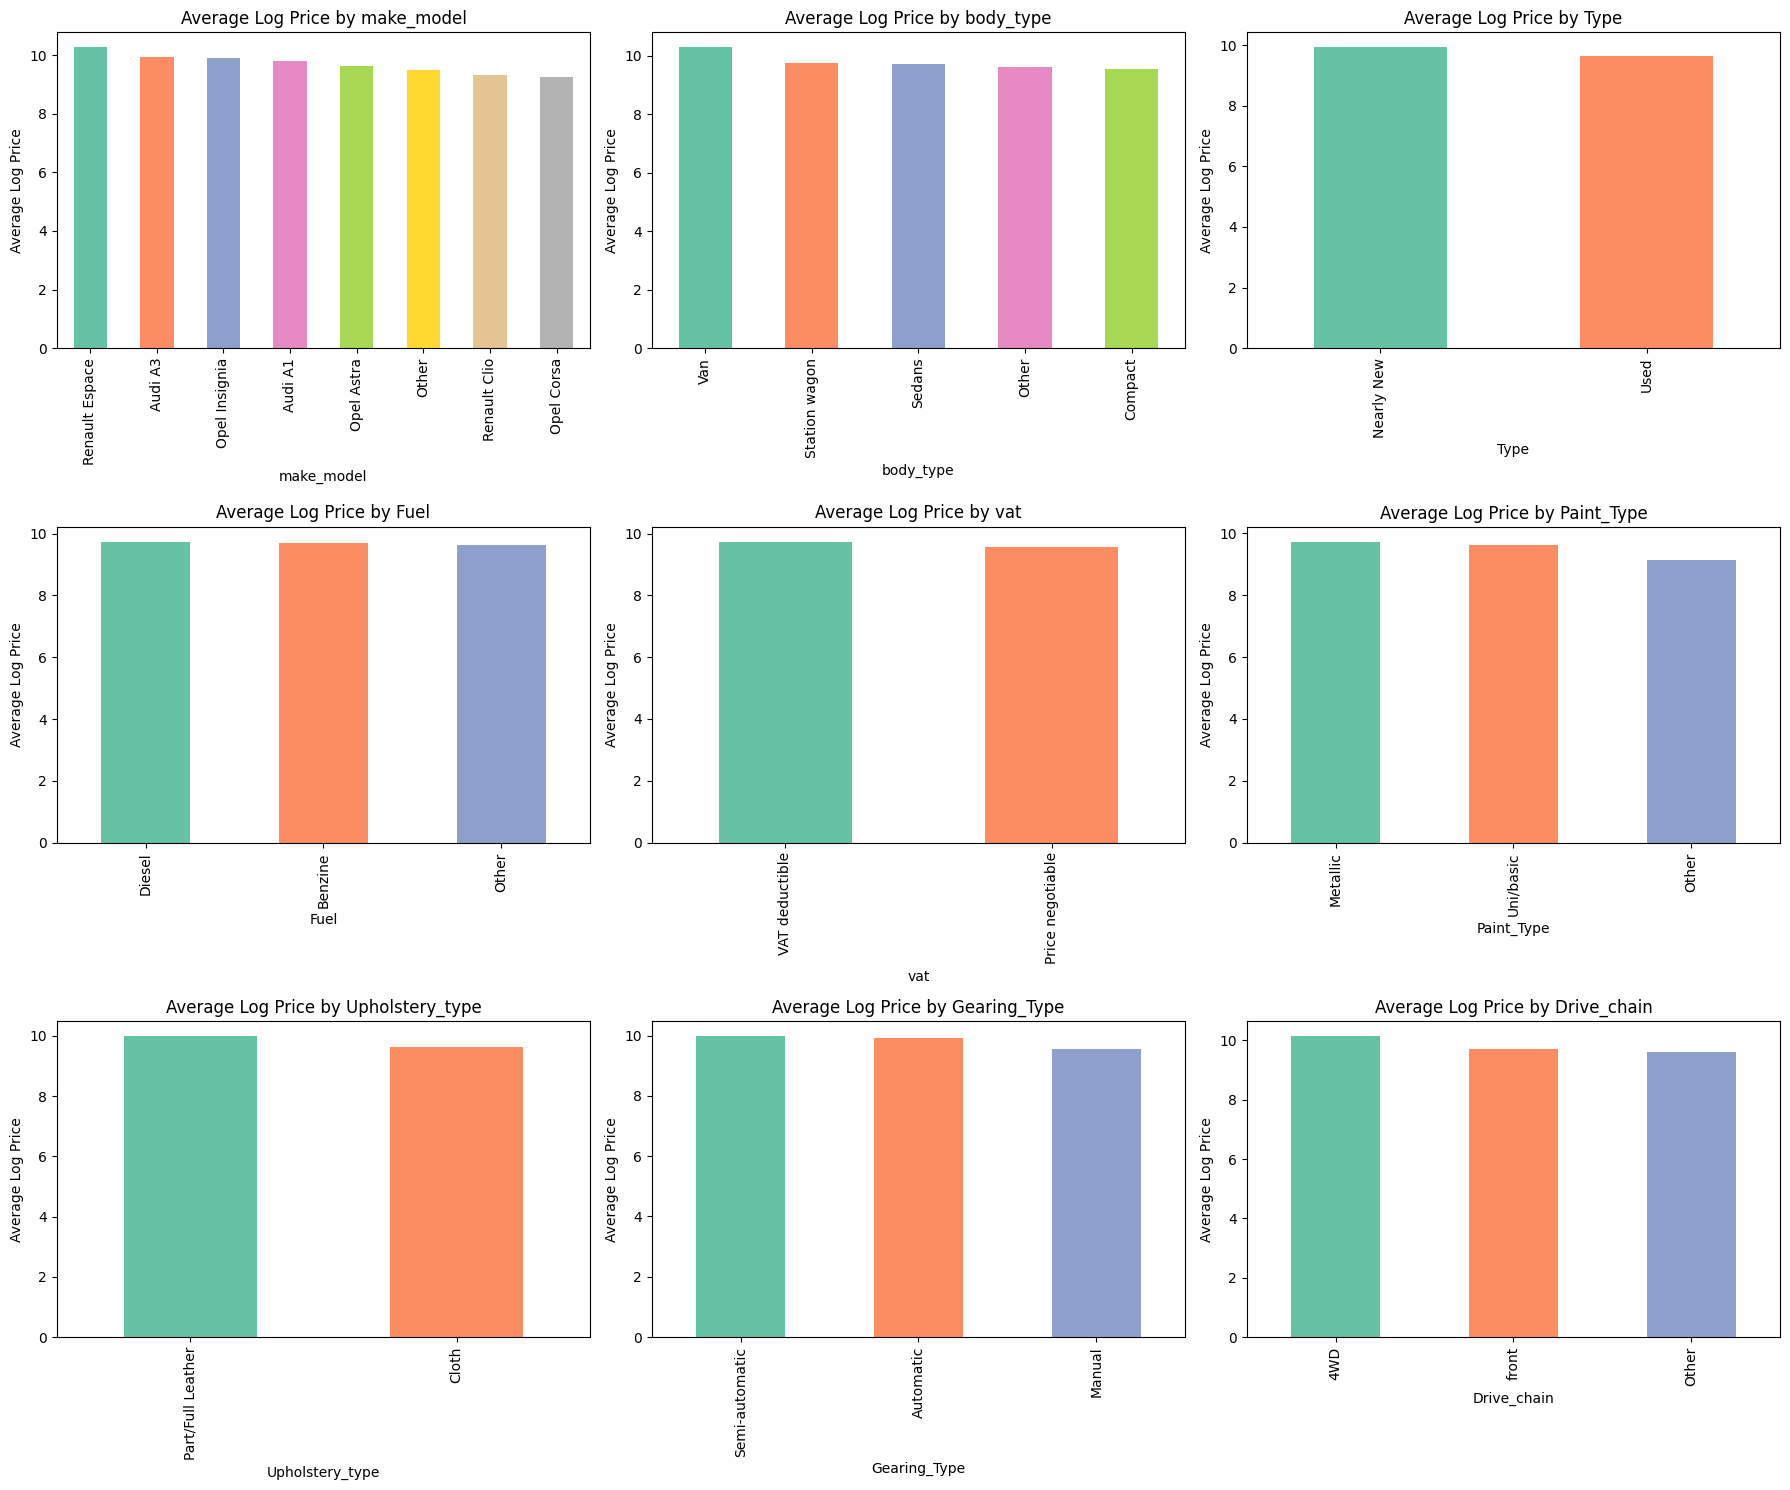

In [20]:
# Comparing average values of target for different categories
categorical_features = [
    'make_model',
    'body_type',
    'Type',
    'Fuel',
    'vat',
    'Paint_Type',
    'Upholstery_type',
    'Gearing_Type',
    'Drive_chain'
]

rows = int(np.ceil(len(categorical_features) / 3))
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    df.groupby(col)['log_price'].mean().sort_values(ascending=False).plot(
        kind='bar',
        ax=axes[idx],
        color=sns.color_palette("Set2")
    )
    axes[idx].set_title(f'Average Log Price by {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Average Log Price')

for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [21]:
categorical_price_summary = {}

for col in categorical_features:
    summary = (
        df.groupby(col)['log_price']
        .agg(['count', 'mean'])
        .sort_values(by='mean', ascending=False)
    )
    categorical_price_summary[col] = summary
    
    print(f"\nAverage log price by {col}:")
    display(summary)



Average log price by make_model:


,count,mean
make_model,,
Renault Espace,991,10.271688
Audi A3,3097,9.928115
Opel Insignia,2598,9.912605
Audi A1,2614,9.817587
Opel Astra,2525,9.625972
Other,35,9.504817
Renault Clio,1839,9.335730
Opel Corsa,2216,9.275962



Average log price by body_type:


,count,mean
body_type,,
Van,817,10.294505
Station wagon,3677,9.753394
Sedans,8004,9.716079
Other,177,9.622857
Compact,3240,9.555660



Average log price by Type:


,count,mean
Type,,
Nearly New,4820,9.928334
Used,11095,9.630496



Average log price by Fuel:


,count,mean
Fuel,,
Diesel,7298,9.734862
Benzine,8548,9.709263
Other,69,9.639389



Average log price by vat:


,count,mean
vat,,
VAT deductible,15044,9.730221
Price negotiable,871,9.556223



Average log price by Paint_Type:


,count,mean
Paint_Type,,
Metallic,15246,9.725340
Uni/basic,637,9.638571
Other,32,9.144455



Average log price by Upholstery_type:


,count,mean
Upholstery_type,,
Part/Full Leather,3681,9.981333
Cloth,12234,9.642278



Average log price by Gearing_Type:


,count,mean
Gearing_Type,,
Semi-automatic,469,9.971954
Automatic,7297,9.906124
Manual,8149,9.540199



Average log price by Drive_chain:


,count,mean
Drive_chain,,
4WD,204,10.133446
front,15707,9.715367
Other,4,9.606097


### **2.3 Outlier analysis** <font color = red> [5 marks] </font>

#### **2.3.1** <font color =red> [2 marks] </font>
Identify potential outliers in the data.

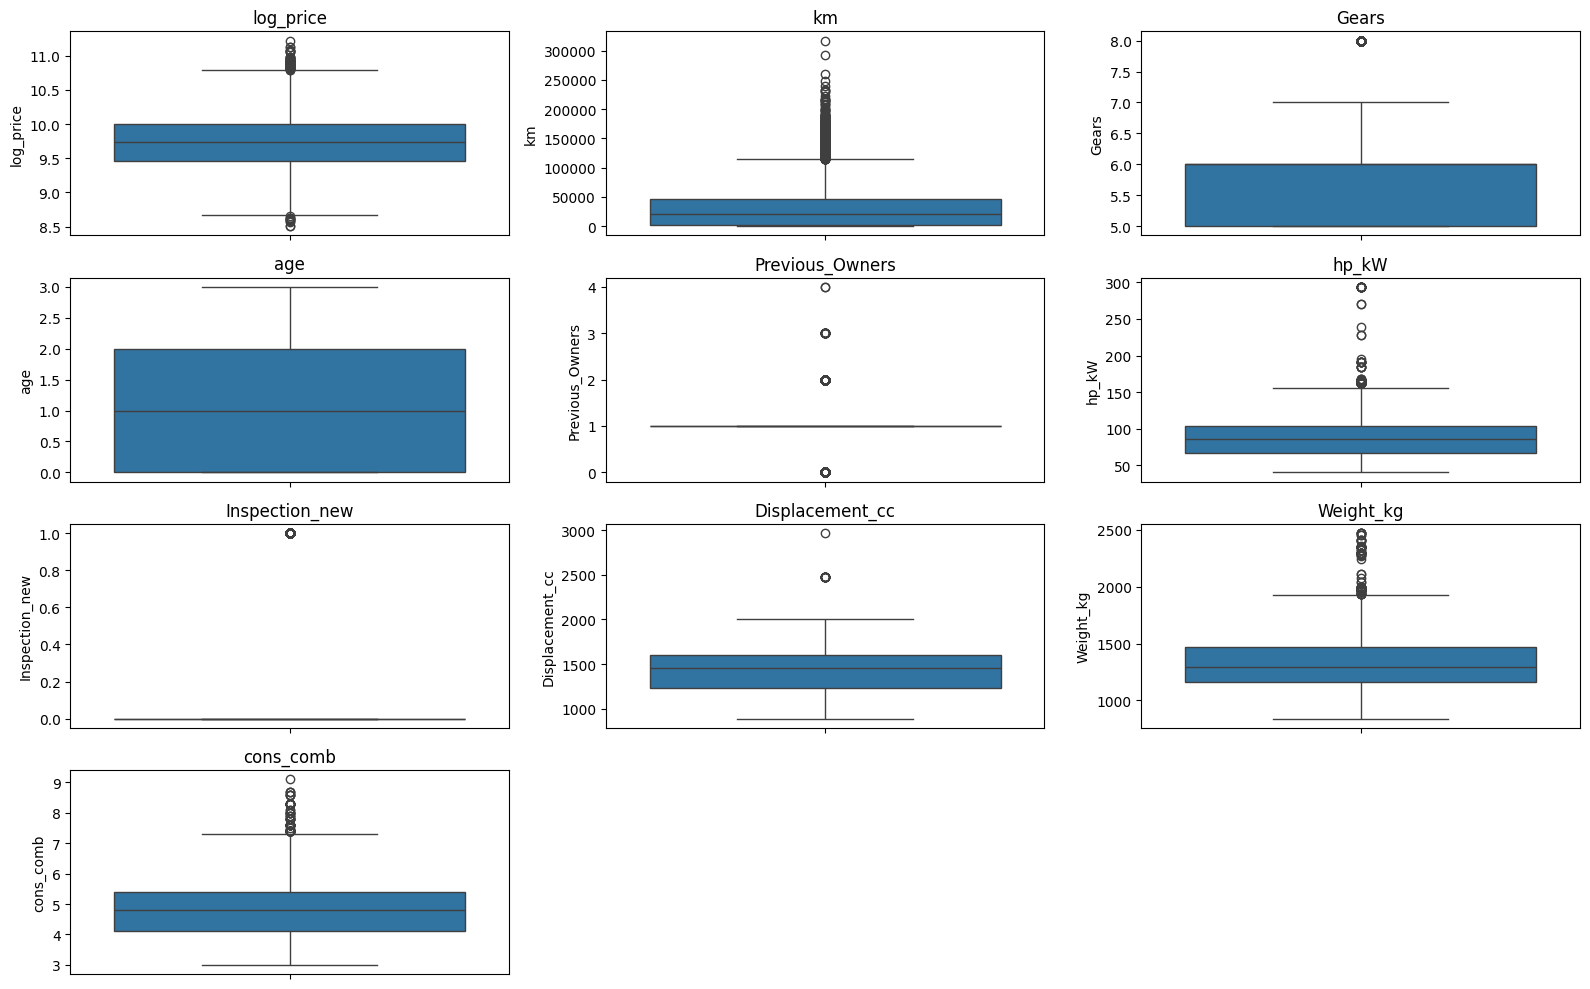

In [22]:
# Outliers present in each column

numerical_cols = [
    'log_price',
    'km',
    'Gears',
    'age',
    'Previous_Owners',
    'hp_kW',
    'Inspection_new',
    'Displacement_cc',
    'Weight_kg',
    'cons_comb'
]

plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [23]:
outlier_info = {}

for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()

    outlier_info[col] = {
        'Lower_Bound': round(lower, 3),
        'Upper_Bound': round(upper, 3),
        'Outlier_Count': outlier_count
    }

outlier_summary = pd.DataFrame(outlier_info).T
outlier_summary


,Lower_Bound,Upper_Bound,Outlier_Count
log_price,8.661,10.794,71.0
km,-65548.750,114369.250,689.0
Gears,3.500,7.500,225.0
age,-3.000,5.000,0.0
Previous_Owners,1.000,1.000,1757.0
hp_kW,10.500,158.500,361.0
Inspection_new,0.000,0.000,3932.0
Displacement_cc,675.500,2151.500,21.0
Weight_kg,704.500,1932.500,87.0
cons_comb,2.150,7.350,125.0


### **Outlier Handling Decision**

Outlier analysis was conducted on all numerical features, including the log-transformed target variable. Continuous variables such as mileage (`km`), engine power (`hp_kW`), engine displacement (`Displacement_cc`), vehicle weight (`Weight_kg`), fuel consumption (`cons_comb`), and the log-transformed price (`log_price`) exhibited extreme values. These were handled using IQR-based capping to reduce their influence on regression estimates while retaining all observations.

Discrete or binary variables such as number of gears (`Gears`), number of previous owners (`Previous_Owners`), inspection status (`Inspection_new`), and vehicle age (`age`) were examined but not subjected to outlier treatment. These variables are either bounded discrete measures or binary indicators, for which statistical outlier handling is not meaningful.

This approach preserves valid real-world variability and improves model stability without removing data.


#### **2.3.2** <font color =red> [3 marks] </font>
Handle the outliers suitably.

In [24]:
# Handle outliers
outlier_handling_cols = [
    'log_price',
    'km',
    'hp_kW',
    'Displacement_cc',
    'Weight_kg',
    'cons_comb'
]

for col in outlier_handling_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower, upper)


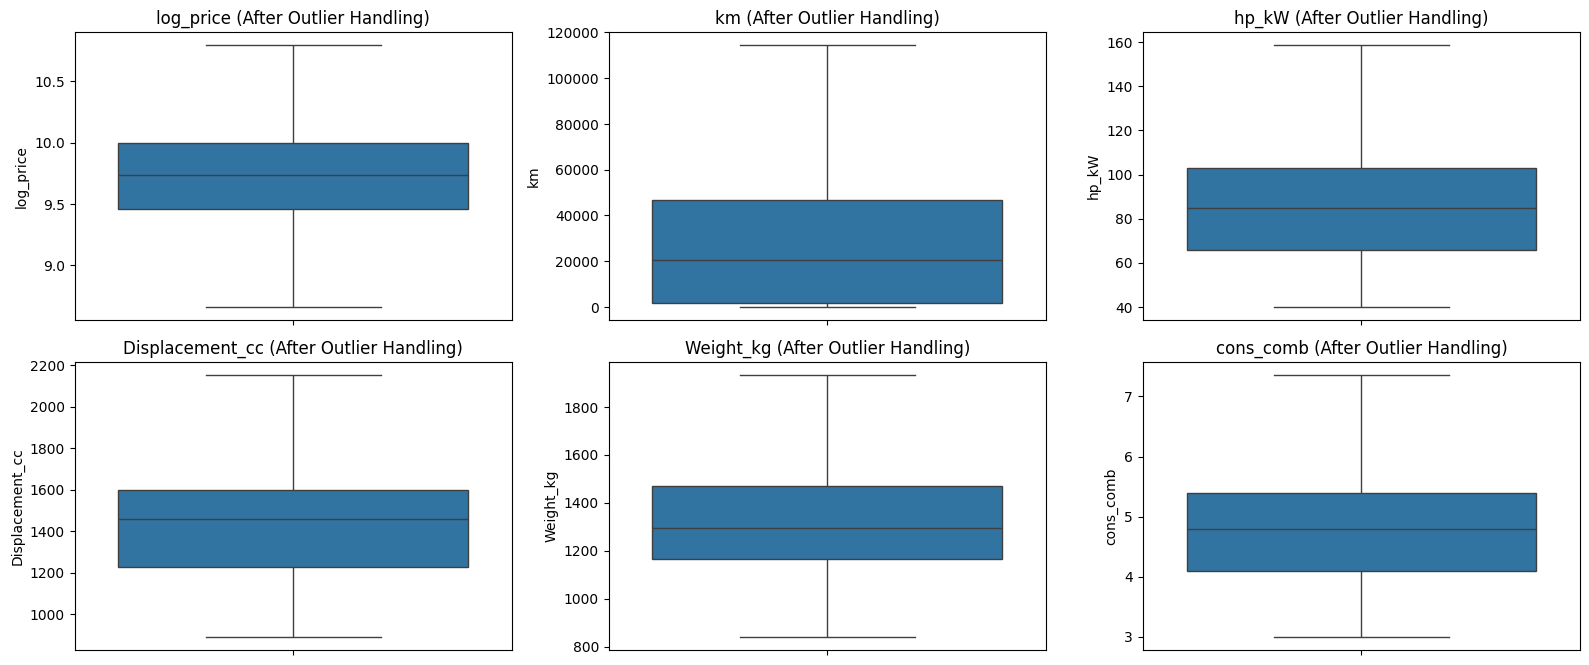

In [25]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(outlier_handling_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col} (After Outlier Handling)')

plt.tight_layout()
plt.show()


In [26]:
post_outlier_summary = {}

for col in outlier_handling_cols:
    post_outlier_summary[col] = {
        'Min': df[col].min(),
        'Max': df[col].max(),
        'Mean': df[col].mean(),
        'Std': df[col].std(),
        'Skewness': df[col].skew()
    }

post_outlier_df = pd.DataFrame(post_outlier_summary).T
post_outlier_df


,Min,Max,Mean,Std,Skewness
log_price,8.661385,10.793956,9.720324,0.396861,-0.054247
km,0.000000,114369.250000,30912.311778,33348.579674,1.151198
hp_kW,40.000000,158.500000,88.180427,25.337765,0.747790
Displacement_cc,890.000000,2151.500000,1428.197832,274.261647,-0.151164
Weight_kg,840.000000,1932.500000,1336.284229,193.966789,0.825926
cons_comb,3.000000,7.350000,4.829243,0.857685,0.323075


### **2.4 Feature Engineering** <font color = red> [11 marks] </font>

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [27]:
# Fix/create columns as needed

model_df = df.copy()
model_df = model_df.drop(columns=['price'])
model_df.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,...,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,log_price
0,Audi A1,Sedans,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control",...,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,9.665865
1,Audi A1,Sedans,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...",...,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,9.581904
2,Audi A1,Sedans,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control",...,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,9.591513
3,Audi A1,Sedans,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control",...,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,9.581904
4,Audi A1,Sedans,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...",...,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,9.728539


The target variable is available in two forms: the original `price` and the log-transformed `log_price`. Since `log_price` was created to correct skewness and better satisfy linear regression assumptions, it is retained as the modeling target.

Keeping both `price` and `log_price` would introduce redundancy and potential data leakage. Therefore, the original `price` column is removed from the modeling dataset.

All remaining columns represent unique vehicle attributes and do not duplicate information. The bundled specification columns (`Comfort_Convenience`, `Entertainment_Media`, `Extras`, `Safety_Security`) are not redundant but contain aggregated feature information and are handled separately in subsequent feature engineering steps.


#### **2.4.2** <font color =red> [4 marks] </font>
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [28]:
# Check unique values in each feature spec column

spec_cols = [
    'Comfort_Convenience',
    'Entertainment_Media',
    'Extras',
    'Safety_Security'
]

print(f"\nUnique values:")
for col in spec_cols:
    print(f"\n{col}:", df[col].nunique())



Unique values:

Comfort_Convenience: 6196

Entertainment_Media: 346

Extras: 659

Safety_Security: 4442


The specification columns contain comma-separated lists of multiple features per vehicle.
Each unique combination appears as a different string, resulting in very high cardinality.

Due to this, these columns cannot be treated as standard categorical variables.
Instead of one-hot encoding individual combinations, a numerical representation is required.

Out of these features, we will check the ones which are present in most of the cars or are absent from most of the cars. These kinds of features can be removed as they just increase the dimensionality without explaining the variance.

In [29]:
# Drop features from df

for col in spec_cols:
    model_df[col + '_count'] = df[col].apply(lambda x: len(str(x).split(',')))


In [30]:
model_df[[col + '_count' for col in spec_cols]].describe().T

,count,mean,std,min,25%,50%,75%,max
Comfort_Convenience_count,15915.0,12.193654,6.051542,1.0,7.0,13.0,17.0,33.0
Entertainment_Media_count,15915.0,4.668489,2.001930,1.0,3.0,5.0,6.0,10.0
Extras_count,15915.0,2.241156,1.503890,1.0,1.0,2.0,3.0,10.0
Safety_Security_count,15915.0,12.786302,4.071223,1.0,11.0,13.0,15.0,29.0


In [31]:
model_df = model_df.drop(columns=spec_cols)
model_df.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,...,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,log_price,Comfort_Convenience_count,Entertainment_Media_count,Extras_count,Safety_Security_count
0,Audi A1,Sedans,VAT deductible,56013.0,Used,Diesel,7.0,3.0,2.0,66.0,...,Automatic,1422.0,1220.0,front,3.8,9.665865,16,4,3,14
1,Audi A1,Sedans,Price negotiable,80000.0,Used,Benzine,7.0,2.0,1.0,141.0,...,Automatic,1798.0,1255.0,front,5.6,9.581904,9,5,4,15
2,Audi A1,Sedans,VAT deductible,83450.0,Used,Diesel,7.0,3.0,1.0,85.0,...,Automatic,1598.0,1135.0,front,3.8,9.591513,13,2,2,12
3,Audi A1,Sedans,VAT deductible,73000.0,Used,Diesel,6.0,3.0,1.0,66.0,...,Automatic,1422.0,1195.0,front,3.8,9.581904,16,8,3,14
4,Audi A1,Sedans,VAT deductible,16200.0,Used,Diesel,7.0,3.0,1.0,66.0,...,Automatic,1422.0,1135.0,front,4.1,9.728539,13,7,4,13


Exploding the specification columns into individual features would significantly increase
dimensionality while contributing limited explanatory power, as many features are either
present in almost all vehicles or in very few.

To address this, each specification column was transformed into a numerical feature
representing the total number of features present. This captures overall feature richness
while maintaining a compact feature space.

After extracting these counts, the original bundled columns were removed to reduce
dimensionality and prevent redundancy.


#### **2.4.3** <font color =red> [3 marks] </font>
Perform feature encoding.

In [32]:
# Encode features
categorical_cols_to_encode = [
    'make_model',
    'body_type',
    'Type',
    'Fuel',
    'vat',
    'Paint_Type',
    'Upholstery_type',
    'Gearing_Type',
    'Drive_chain'
]

model_df_encoded = pd.get_dummies(
    model_df,
    columns=categorical_cols_to_encode,
    drop_first=True
)

model_df_encoded.head()


,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,log_price,...,Fuel_Diesel,Fuel_Other,vat_VAT deductible,Paint_Type_Other,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_Other,Drive_chain_front
0,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,9.665865,...,True,False,True,False,False,False,False,False,False,True
1,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,9.581904,...,False,False,False,False,False,False,False,False,False,True
2,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,9.591513,...,True,False,True,False,False,False,False,False,False,True
3,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,9.581904,...,True,False,True,False,False,False,False,False,False,True
4,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,9.728539,...,True,False,True,False,False,False,False,False,False,True


Linear regression models require all input features to be numerical. Therefore, categorical
variables were converted into numerical form using one-hot encoding.

One-hot encoding creates binary indicator variables for each category. To avoid the dummy
variable trap and multicollinearity, one category from each feature was dropped using
`drop_first=True`.

This encoding strategy preserves category-level information while ensuring compatibility
with linear and regularised regression models.

#### **2.4.4** <font color =red> [2 marks] </font>
Split the data into training and testing sets.

In [33]:
# Split data
X = model_df_encoded.drop(columns=['log_price'])
y = model_df_encoded['log_price']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((12732, 35), (3183, 35))

he final model-ready dataset was split into training and testing sets using an 80–20 split.

An 80% training set provides sufficient data for learning model parameters, while the remaining 20% is held out for unbiased evaluation.

A fixed random_state was used to ensure reproducibility of results across different runs and model comparisons.

#### **2.4.5** <font color =red> [2 marks] </font>
Scale the features.

In [34]:
# Scale features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((12732, 35), (3183, 35))

Feature scaling was performed using standardisation to ensure that all numerical features have zero mean and unit variance.

Scaling is essential for regularised regression models such as Ridge and Lasso, as these models are sensitive to feature magnitude.

The scaler was fitted only on the training data and then applied to the test data to prevent data leakage.

## **3 Linear Regression Models** <font color =red> [35 marks] </font>


### **3.1 Baseline Linear Regression Model** <font color =red> [10 marks] </font>

#### **3.1.1** <font color =red> [5 marks] </font>
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [35]:
# Initialise and train model
lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

In [36]:
# Evaluate the model's performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

lr_results = pd.DataFrame({
    'Metric': ['R2', 'RMSE', 'MAE'],
    'Train': [train_r2, train_rmse, train_mae],
    'Test': [test_r2, test_rmse, test_mae]
})

lr_results

,Metric,Train,Test
0,R2,0.917615,0.923927
1,RMSE,0.113778,0.109923
2,MAE,0.084729,0.082905


The baseline linear regression model shows strong performance on both training and test datasets.

The R² values are high and nearly identical for training and testing, indicating that the model explains a large proportion of variance in the target variable and generalises well.

RMSE and MAE values are low and consistent across both sets, suggesting stable and reliable predictions with no evidence of overfitting at this stage.


#### **3.1.2** <font color =red> [5 marks] </font>
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

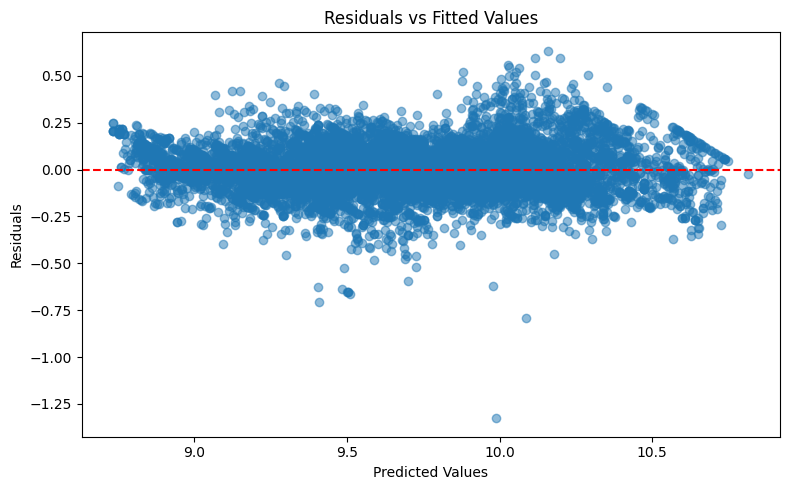

In [37]:
# Linearity check: Plot residuals vs fitted values

y_train_pred = lr_model.predict(X_train_scaled)

residuals = y_train - y_train_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.tight_layout()
plt.show()

Check normality in residual distribution

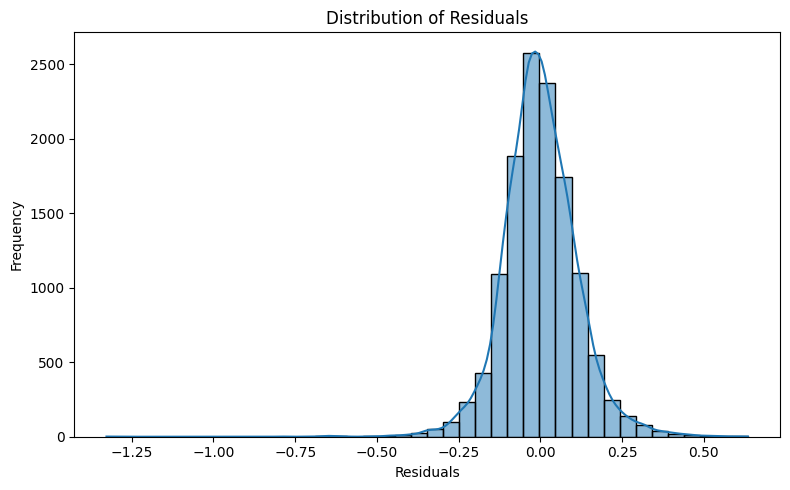

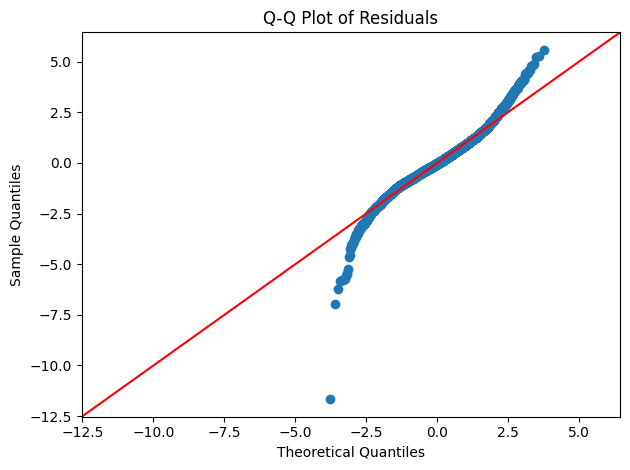

,Value
Residual_Mean,7.785164e-17
Residual_Std,1.137828e-01
Residual_Min,-1.327349e+00
Residual_Max,6.347075e-01
Residual_Skewness,-2.113481e-02
Residual_Kurtosis,3.760490e+00
Correlation_Predicted_Residuals,6.298948e-15


In [38]:
# Check the normality of residuals by plotting their distribution

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=40, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

residual_stats = {
    "Residual_Mean": residuals.mean(),
    "Residual_Std": residuals.std(),
    "Residual_Min": residuals.min(),
    "Residual_Max": residuals.max(),
    "Residual_Skewness": residuals.skew(),
    "Residual_Kurtosis": residuals.kurtosis(),
    "Correlation_Predicted_Residuals": np.corrcoef(y_train_pred, residuals)[0, 1]
}


pd.DataFrame(residual_stats, index=["Value"]).T


Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

In [39]:
# Check for multicollinearity and handle

X_vif = pd.DataFrame(X_train_scaled, columns=X.columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_data.sort_values(by="VIF", ascending=False)


,Feature,VIF
19,make_model_Renault Espace,8.721870
4,hp_kW,7.787127
25,Fuel_Diesel,6.650376
6,Displacement_cc,6.561095
23,body_type_Van,6.306592
16,make_model_Opel Insignia,5.134952
8,cons_comb,4.132330
7,Weight_kg,4.123708
2,age,4.033611
15,make_model_Opel Corsa,3.970011


### **3.2 Ridge Regression Implementation** <font color =red> [10 marks] </font>

#### **3.2.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [40]:
# List of alphas to tune for Ridge regularisation

alphas = np.logspace(-2, 2, 15)
alphas


array([1.00000000e-02, 1.93069773e-02, 3.72759372e-02, 7.19685673e-02,
       1.38949549e-01, 2.68269580e-01, 5.17947468e-01, 1.00000000e+00,
       1.93069773e+00, 3.72759372e+00, 7.19685673e+00, 1.38949549e+01,
       2.68269580e+01, 5.17947468e+01, 1.00000000e+02])

#### **3.2.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [41]:
# Applying Ridge regression

train_mae = []
test_mae = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)
    
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))


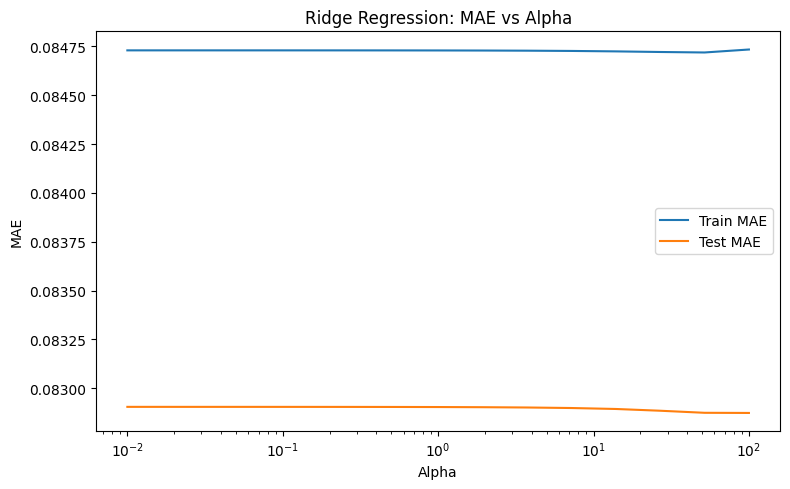

In [42]:
# Plot train and test scores against alpha

plt.figure(figsize=(8, 5))
plt.plot(alphas, train_mae, label='Train MAE')
plt.plot(alphas, test_mae, label='Test MAE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('Ridge Regression: MAE vs Alpha')
plt.legend()
plt.tight_layout()
plt.show()


Find the best alpha value.

In [43]:
# Best alpha value

best_alpha = alphas[np.argmin(test_mae)]
print(best_alpha)


# Best score (negative MAE)
best_neg_mae = -min(test_mae)
print(best_neg_mae)

100.0
-0.08287375742756681


We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [44]:
# Take a smaller range of alpha to test

fine_alphas = np.logspace(1.5, 2.5, 20)

In [45]:
# Applying Ridge regression

train_mae_fine = []
test_mae_fine = []

for alpha in fine_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)

    train_mae_fine.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_fine.append(mean_absolute_error(y_test, y_test_pred))

Plot the error-alpha graph again and find the actual optimal value for alpha.

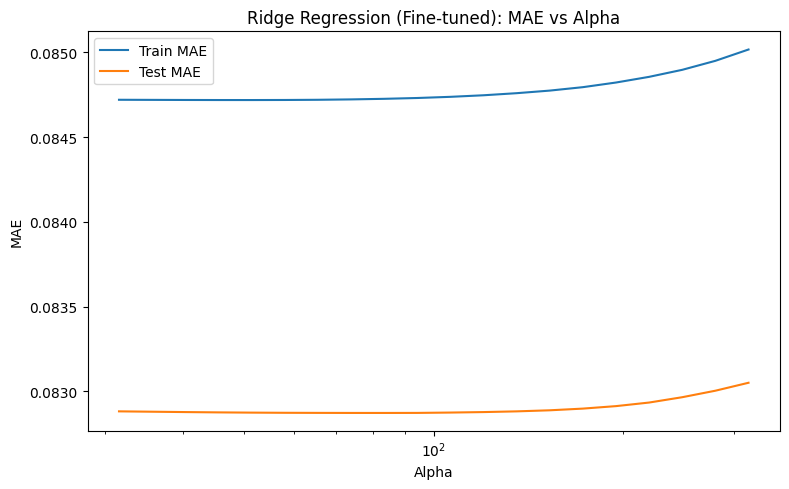

83.37822234717892
-0.08287271981172553


In [49]:
# Plot train and test scores against alpha
plt.figure(figsize=(8, 5))
plt.plot(fine_alphas, train_mae_fine, label='Train MAE')
plt.plot(fine_alphas, test_mae_fine, label='Test MAE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('Ridge Regression (Fine-tuned): MAE vs Alpha')
plt.legend()
plt.tight_layout()
plt.show()


# Best alpha value
best_alpha_fine = fine_alphas[np.argmin(test_mae_fine)]
print(best_alpha_fine)

# Best score (negative MAE)

best_neg_mae_fine = -min(test_mae_fine)
print(best_neg_mae_fine)

In [50]:
# Set best alpha for Ridge regression
ridge_final = Ridge(alpha=best_alpha_fine)
ridge_final.fit(X_train_scaled, y_train)

# Fit the Ridge model to get the coefficients of the fitted model
ridge_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_final.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

ridge_coefficients


,Feature,Coefficient
15,make_model_Opel Corsa,-0.141451
18,make_model_Renault Clio,-0.118613
4,hp_kW,0.112483
2,age,-0.102407
0,km,-0.088019
14,make_model_Opel Astra,-0.079213
31,Gearing_Type_Manual,-0.060819
9,Comfort_Convenience_count,0.051928
19,make_model_Renault Espace,0.037782
13,make_model_Audi A3,0.035686


In [51]:
# Show the coefficients for each feature

ridge_coefficients.head(10)

,Feature,Coefficient
15,make_model_Opel Corsa,-0.141451
18,make_model_Renault Clio,-0.118613
4,hp_kW,0.112483
2,age,-0.102407
0,km,-0.088019
14,make_model_Opel Astra,-0.079213
31,Gearing_Type_Manual,-0.060819
9,Comfort_Convenience_count,0.051928
19,make_model_Renault Espace,0.037782
13,make_model_Audi A3,0.035686


In [52]:
# Evaluate the Ridge model on the test data

y_test_pred_final = ridge_final.predict(X_test_scaled)

ridge_test_metrics = pd.DataFrame({
    'Metric': ['R2', 'RMSE', 'MAE'],
    'Value': [
        r2_score(y_test, y_test_pred_final),
        np.sqrt(mean_squared_error(y_test, y_test_pred_final)),
        mean_absolute_error(y_test, y_test_pred_final)
    ]
})

ridge_test_metrics

,Metric,Value
0,R2,0.923930
1,RMSE,0.109920
2,MAE,0.082873


### **3.3 Lasso Regression Implementation** <font color =red> [10 marks] </font>

#### **3.3.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [53]:
# List of alphas to tune for Lasso regularisation

lasso_alphas = np.logspace(-4, 0, 15)
lasso_alphas

array([1.00000000e-04, 1.93069773e-04, 3.72759372e-04, 7.19685673e-04,
       1.38949549e-03, 2.68269580e-03, 5.17947468e-03, 1.00000000e-02,
       1.93069773e-02, 3.72759372e-02, 7.19685673e-02, 1.38949549e-01,
       2.68269580e-01, 5.17947468e-01, 1.00000000e+00])

#### **3.3.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [54]:
# Initialise Lasso regression model

train_mae_l1 = []
test_mae_l1 = []

for a in lasso_alphas:
    lasso_tmp = Lasso(alpha=a, max_iter=10000)
    lasso_tmp.fit(X_train_scaled, y_train)
    
    y_tr_pred = lasso_tmp.predict(X_train_scaled)
    y_te_pred = lasso_tmp.predict(X_test_scaled)
    
    train_mae_l1.append(mean_absolute_error(y_train, y_tr_pred))
    test_mae_l1.append(mean_absolute_error(y_test, y_te_pred))

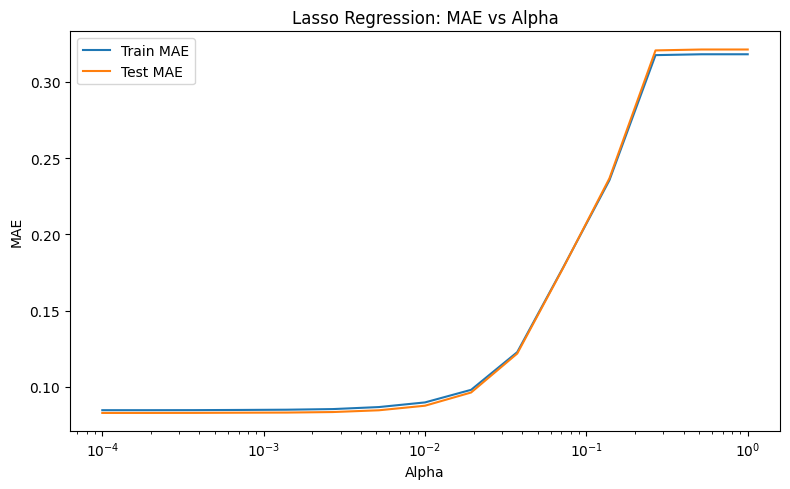

In [55]:
# Plot train and test scores against alpha

plt.figure(figsize=(8, 5))
plt.plot(lasso_alphas, train_mae_l1, label='Train MAE')
plt.plot(lasso_alphas, test_mae_l1, label='Test MAE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('Lasso Regression: MAE vs Alpha')
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# Best alpha value
best_alpha_lasso = lasso_alphas[np.argmin(test_mae_l1)]
print(best_alpha_lasso)

# Best score (negative MAE)

best_neg_mae_lasso = -min(test_mae_l1)
print(best_neg_mae_lasso)

0.0001
-0.08291207630233026


#### **3.3.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [57]:
# List of alphas to tune for Lasso regularization

fine_lasso_alphas = np.logspace(
    np.log10(best_alpha_lasso) - 1,
    np.log10(best_alpha_lasso) + 1,
    20
)

fine_lasso_alphas

array([1.00000000e-05, 1.27427499e-05, 1.62377674e-05, 2.06913808e-05,
       2.63665090e-05, 3.35981829e-05, 4.28133240e-05, 5.45559478e-05,
       6.95192796e-05, 8.85866790e-05, 1.12883789e-04, 1.43844989e-04,
       1.83298071e-04, 2.33572147e-04, 2.97635144e-04, 3.79269019e-04,
       4.83293024e-04, 6.15848211e-04, 7.84759970e-04, 1.00000000e-03])

In [58]:
# Tuning Lasso hyperparameters

train_mae_l1_fine = []
test_mae_l1_fine = []

for a in fine_lasso_alphas:
    lasso_tmp = Lasso(alpha=a, max_iter=10000)
    lasso_tmp.fit(X_train_scaled, y_train)
    
    y_tr_pred = lasso_tmp.predict(X_train_scaled)
    y_te_pred = lasso_tmp.predict(X_test_scaled)
    
    train_mae_l1_fine.append(mean_absolute_error(y_train, y_tr_pred))
    test_mae_l1_fine.append(mean_absolute_error(y_test, y_te_pred))

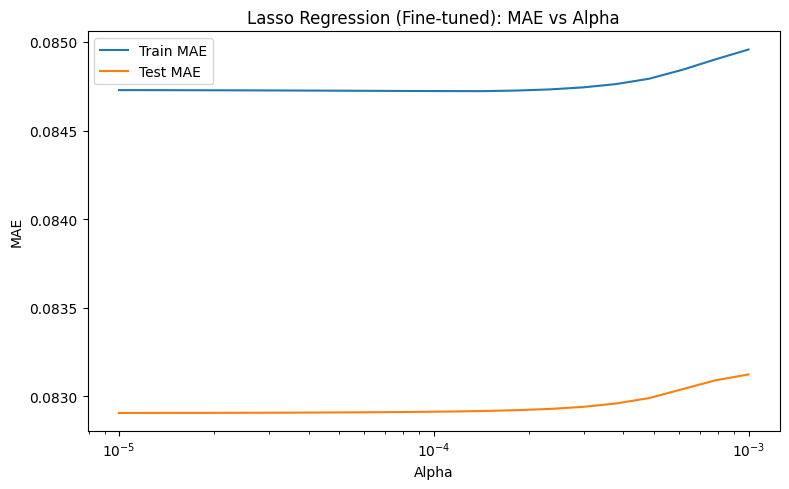

In [59]:
# Plot train and test scores against alpha

plt.figure(figsize=(8, 5))
plt.plot(fine_lasso_alphas, train_mae_l1_fine, label='Train MAE')
plt.plot(fine_lasso_alphas, test_mae_l1_fine, label='Test MAE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('Lasso Regression (Fine-tuned): MAE vs Alpha')
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
# Best alpha value
best_alpha_lasso_fine = fine_lasso_alphas[np.argmin(test_mae_l1_fine)]
print(best_alpha_lasso_fine)

# Best score (negative MAE)

best_neg_mae_lasso_fine = -min(test_mae_l1_fine)
print(best_neg_mae_lasso_fine)

1e-05
-0.08290525100808689


In [61]:
# Set best alpha for Lasso regression
lasso_final = Lasso(alpha=best_alpha_lasso_fine, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Fit the Lasso model on scaled training data
# Get the coefficients of the fitted model

lasso_coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_final.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

lasso_coeffs

,Feature,Coefficient
15,make_model_Opel Corsa,-0.144101
18,make_model_Renault Clio,-0.121300
4,hp_kW,0.114424
2,age,-0.103650
0,km,-0.088019
14,make_model_Opel Astra,-0.081816
31,Gearing_Type_Manual,-0.061625
9,Comfort_Convenience_count,0.052092
19,make_model_Renault Espace,0.037108
13,make_model_Audi A3,0.034488


In [62]:
# Check the coefficients for each feature
lasso_coeffs.head(10)


,Feature,Coefficient
15,make_model_Opel Corsa,-0.144101
18,make_model_Renault Clio,-0.121300
4,hp_kW,0.114424
2,age,-0.103650
0,km,-0.088019
14,make_model_Opel Astra,-0.081816
31,Gearing_Type_Manual,-0.061625
9,Comfort_Convenience_count,0.052092
19,make_model_Renault Espace,0.037108
13,make_model_Audi A3,0.034488


In [63]:
# Evaluate the Lasso model on the test data

y_test_pred_lasso = lasso_final.predict(X_test_scaled)

lasso_test_metrics = pd.DataFrame({
    'Metric': ['R2', 'RMSE', 'MAE'],
    'Value': [
        r2_score(y_test, y_test_pred_lasso),
        np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)),
        mean_absolute_error(y_test, y_test_pred_lasso)
    ]
})

lasso_test_metrics

,Metric,Value
0,R2,0.923926
1,RMSE,0.109923
2,MAE,0.082905


### **3.4 Regularisation Comparison & Analysis** <font color =red> [5 marks] </font>

#### **3.4.1** <font color =red> [2 marks] </font>
Compare the evaluation metrics for each model.

In [64]:
# Compare metrics for each model

model_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R2': [
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_pred_final),
        r2_score(y_test, y_test_pred_lasso)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_final)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
    ],
    'MAE': [
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred_final),
        mean_absolute_error(y_test, y_test_pred_lasso)
    ]
})

print(model_metrics)

               Model        R2      RMSE       MAE
0  Linear Regression  0.923517  0.110219  0.083051
1   Ridge Regression  0.923930  0.109920  0.082873
2   Lasso Regression  0.923926  0.109923  0.082905


#### **3.4.2** <font color =red> [3 marks] </font>
Compare the coefficients for the three models.

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

In [65]:
# Compare highest coefficients and coefficients of eliminated features

coef_compare = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr_model.coef_,
    'Ridge': ridge_final.coef_,
    'Lasso': lasso_final.coef_
})

coef_compare['Linear_abs'] = coef_compare['Linear'].abs()
coef_compare['Ridge_abs'] = coef_compare['Ridge'].abs()
coef_compare['Lasso_abs'] = coef_compare['Lasso'].abs()

top_linear = coef_compare.sort_values(by='Linear_abs', ascending=False).head(10)
top_ridge = coef_compare.sort_values(by='Ridge_abs', ascending=False).head(10)
top_lasso = coef_compare.sort_values(by='Lasso_abs', ascending=False).head(10)

print(top_linear, top_ridge, top_lasso)

                      Feature    Linear     Ridge     Lasso  Linear_abs  \
15      make_model_Opel Corsa -0.144109 -0.141451 -0.144101    0.144109   
18    make_model_Renault Clio -0.121328 -0.118613 -0.121300    0.121328   
4                       hp_kW  0.114498  0.112483  0.114424    0.114498   
2                         age -0.103635 -0.102407 -0.103650    0.103635   
0                          km -0.088036 -0.088019 -0.088019    0.088036   
14      make_model_Opel Astra -0.081822 -0.079213 -0.081816    0.081822   
31        Gearing_Type_Manual -0.061613 -0.060819 -0.061625    0.061613   
9   Comfort_Convenience_count  0.052123  0.051928  0.052092    0.052123   
19  make_model_Renault Espace  0.037208  0.037782  0.037108    0.037208   
13         make_model_Audi A3  0.034503  0.035686  0.034488    0.034503   

    Ridge_abs  Lasso_abs  
15   0.141451   0.144101  
18   0.118613   0.121300  
4    0.112483   0.114424  
2    0.102407   0.103650  
0    0.088019   0.088019  
14   0.07921

In [66]:
dropped_features = coef_compare[coef_compare['Lasso'] == 0][['Feature']]
print(dropped_features)

Empty DataFrame
Columns: [Feature]
Index: []


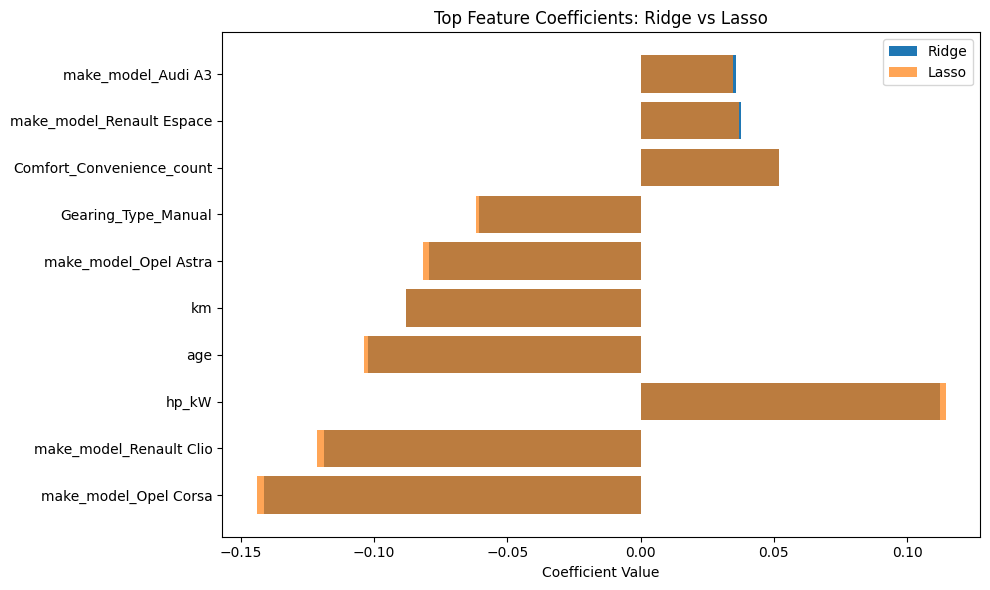

In [67]:
plt.figure(figsize=(10, 6))
plt.barh(top_ridge['Feature'], top_ridge['Ridge'], label='Ridge')
plt.barh(top_lasso['Feature'], top_lasso['Lasso'], alpha=0.7, label='Lasso')
plt.xlabel('Coefficient Value')
plt.title('Top Feature Coefficients: Ridge vs Lasso')
plt.legend()
plt.tight_layout()
plt.show()

## **4 Conclusion & Key Takeaways**  <font color =red> [10 marks] </font>

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

Regularisation was applied to address multicollinearity and improve model generalisation. Both Ridge and Lasso regression produced slightly better performance than the baseline linear regression, as reflected by marginal improvements in R², RMSE, and MAE on the test set. The improvement is incremental rather than dramatic, indicating that the baseline model was already well-fitted.

No strong evidence of overfitting was observed in the baseline model, as training and test performance were very similar. However, regularisation helped stabilise coefficient estimates and marginally improved generalisation, particularly in the presence of correlated engine-related features such as power, displacement, and weight.

The dataset size (15,915 observations) is sufficiently large and diverse, covering a wide range of vehicle types and specifications. This richness allows linear models to capture most of the systematic variation in prices without requiring highly complex modeling techniques.

Lasso regression did not eliminate any features, suggesting that after feature engineering, no predictor was completely redundant. Ridge regression proved more suitable for this dataset, as it effectively handled multicollinearity without sacrificing important information.

Overall, a linear modeling approach is sufficient for this problem. The strong performance of all three models indicates that the relationship between vehicle characteristics and log-transformed price is largely linear once appropriate preprocessing, transformation, and feature engineering steps are applied.

#### **4.1 Conclude with outcomes and insights gained** <font color =red> [10 marks] </font>

- Log transformation of the target variable significantly improved distribution symmetry and stabilised variance, enabling better adherence to linear regression assumptions.

- Proper feature engineering, including consolidation of rare categories and numerical encoding of bundled specification columns, reduced noise and dimensionality without losing important information.

- The baseline linear regression model already demonstrated strong predictive performance, indicating that the underlying relationship between features and price is largely linear.

- Ridge regression provided the most stable improvement by effectively handling multicollinearity among correlated features such as engine power, displacement, and vehicle weight.

- Lasso regression did not eliminate any features, suggesting that the engineered feature set contains no strongly redundant predictors.

- Regularisation improved coefficient stability more than predictive accuracy, with only marginal gains in evaluation metrics over the baseline model.

- Key drivers of vehicle price remained consistent across all models, including engine power, mileage, age, and specific vehicle models.

- No evidence of overfitting was observed, as training and test performance remained closely aligned across models.

- The dataset is sufficiently large and informative, supporting reliable estimation of model parameters.

- Overall, linear and regularised regression models are appropriate, interpretable, and effective for predicting used car prices in this dataset.


## Summary

Once the data was well-prepared, a simple linear model already captured
most of the signal in the dataset.

Regularisation primarily improved coefficient stability under
multicollinearity rather than predictive accuracy, reinforcing the
importance of preprocessing and model judgment in applied ML systems.
